# 🚚 Fase 05: Logistics & Delivery Performance
---
**Objetivo**: Analizar la eficiencia logística y el cumplimiento de promesas de entrega.

## 1. Carga de Datos
* Objetivo: Preparar el entorno y cargar los datasets necesarios para el análisis logístico.
* Datasets: orders_cleaned.csv y order_items_totals.csv.

In [3]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path_processed = "../data/processed"
# Convertir strings a objetos `datetime`:

# Carga de datos
orders = pd.read_csv(f'{path_processed}/orders_cleaned.csv',
                        parse_dates=['order_purchase_timestamp', 
                                      'order_approved_at', 
                                      'order_delivered_carrier_date', 
                                      'order_delivered_customer_date', 
                                      'order_estimated_delivery_date'])
customers = pd.read_csv(f"{path_processed}/customers_cleaned.csv")
items = pd.read_csv(f"{path_processed}/items_cleaned.csv")
products = pd.read_csv(f"{path_processed}/products_cleaned.csv")

In [5]:
orders.info()
orders.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time_days             96476 non-null  float64       
 9   delta_estimated_days           96476 non-null  float64       
dtypes: datetime64[ns](5), float64(2), object(3)
memory usage: 7.6+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,delta_estimated_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0


In [6]:
customers.info()
customers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [7]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [8]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## 2. Segmentación del Desempeño Logístico
* **Objetivo:** Clasificar los pedidos según el cumplimiento de la promesa de entrega.
* **Lógica:**
    * Pedidos con `delta_estimated_days` > 0: **Retrasados**.
    * Pedidos con `delta_estimated_days` <= 0: **A tiempo / Anticipados**.

In [10]:
# 1. Aseguro la creación de la categoría basada en el delta que ya tengo
orders['delivery_status'] = orders['delta_estimated_days'].apply(
    lambda x: 'Retrasado' if x > 0 else 'A tiempo / Anticipado'
)

# 2. Ahora sí, cuento cuántos hay de cada categoría (Status)
resumen_logistica = orders['delivery_status'].value_counts(normalize=True) * 100

print("--- Análisis de Cumplimiento de Entrega ---")
print(resumen_logistica)

# 3. Confirmo el número absoluto de retrasos
total_retrasos = (orders['delivery_status'] == 'Retrasado').sum()
print(f"\nTotal de pedidos con retraso: {total_retrasos}")

--- Análisis de Cumplimiento de Entrega ---
delivery_status
A tiempo / Anticipado    93.428264
Retrasado                 6.571736
Name: proportion, dtype: float64

Total de pedidos con retraso: 6535


#### 📝 Conclusión del análisis de la segmentación del desempeño logístico:
Insight de Entrega: El sistema logístico de Olist cumple con la promesa de entrega en el 93.4 % de los casos. Sin embargo, existe un 6.5 % de pedidos (6,535 órdenes) que llegan después de la fecha estimada, lo cual es un volumen crítico que impacta directamente en la satisfacción del cliente y posibles reclamos.

## 3. Análisis Geográfico de Retrasos
* **Objetivo:** Identificar los estados con mayor índice de incumplimiento.
* **Pregunta de Negocio:** ¿El retraso es culpa de la infraestructura de ciertos estados o es un problema global?
* **Técnica:** Agrupación por estado y cálculo del porcentaje de pedidos retrasados.

In [13]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,delta_estimated_days,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,A tiempo / Anticipado
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0,A tiempo / Anticipado
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0,A tiempo / Anticipado


In [14]:
# Voy a cruzar 'todos los pedidos' con los clientes para obtener el estado
# Es importante recordar que debo contar todos los pedidos dentro de 1 estado
query_delays_geo = """
SELECT
    customer_state,
    SUM(
        CASE
            WHEN delivery_status = 'Retrasado' THEN 1
            ELSE 0
        END
    ) AS delayed_orders,
    ROUND(SUM(
        CASE
            WHEN delivery_status = 'Retrasado' THEN 1
            ELSE 0
        END
    ) / COUNT(*) * 100, 2)  AS porcentage_delayed  
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
WHERE order_status = 'delivered'
GROUP BY 1
ORDER BY porcentage_delayed DESC
LIMIT 10;
"""
duckdb.sql(query_delays_geo).show()

┌────────────────┬────────────────┬────────────────────┐
│ customer_state │ delayed_orders │ porcentage_delayed │
│    varchar     │     int128     │       double       │
├────────────────┼────────────────┼────────────────────┤
│ AL             │             85 │              21.41 │
│ MA             │            125 │              17.43 │
│ SE             │             51 │              15.22 │
│ PI             │             66 │              13.87 │
│ CE             │            176 │              13.76 │
│ RR             │              5 │               12.2 │
│ BA             │            396 │              12.16 │
│ RJ             │           1495 │              12.11 │
│ PA             │            106 │              11.21 │
│ ES             │            214 │              10.73 │
├────────────────┴────────────────┴────────────────────┤
│ 10 rows                                    3 columns │
└──────────────────────────────────────────────────────┘



In [15]:
# Calculo el promedio nacional de retraso para comparar
national_average = (orders['delivery_status'] == 'Retrasado').mean() * 100
print(f"El porcentaje real de retraso nacional es: {national_average:.2f}%")

El porcentaje real de retraso nacional es: 6.57%


#### 📝 Insight de Volumen vs. Proporción: 
Existe una disparidad geográfica importante. Mientras que estados remotos como **RR** (Roraima) tienen un porcentaje alto (**12.2%**) con solo **5 retrasos** debido a su bajo volumen, el caso de **RJ** (Rio de Janeiro) es alarmante: mantiene un porcentaje similar (**12.1%**) pero con un volumen masivo de **1,495 retrasos**, lo que sugiere problemas de seguridad o saturación urbana que difieren de los problemas de distancia del Norte. Esto indica que el problema en RJ es estructural y de alto impacto para la empresa.

## 4. Correlación: Logística vs. Satisfacción del Cliente
* **Objetivo:** Cuantificar la caída en el `review_score` cuando un pedido se retrasa.
* **Hipótesis:** Existe una relación inversamente proporcional o proporcionalidad inversa, entre los días de retraso (`delta_estimated_days`) y la calificación del cliente.

In [18]:
# 1. Cargo el dataset de reviews
orders_reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')

In [19]:
orders_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [20]:
# 2. Uno mi dataframe de logística (orders) y reviews
satisfaction_df = pd.merge(
    orders[['order_id', 'delivery_status', 'delta_estimated_days']],
    orders_reviews[['order_id', 'review_score']],
    on='order_id'
)
satisfaction_df.head(3)

,order_id,delivery_status,delta_estimated_days,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,A tiempo / Anticipado,-8.0,4
1,53cdb2fc8bc7dce0b6741e2150273451,A tiempo / Anticipado,-6.0,4
2,47770eb9100c2d0c44946d9cf07ec65d,A tiempo / Anticipado,-18.0,5


In [21]:
# 3. Calculo el Score Promedio según el Status de entrega
average_satisfaction = satisfaction_df.groupby('delivery_status')['review_score'].mean().round(3)
print("Impacto del cumplimiento en la calificación promedio:")
print(average_satisfaction)

Impacto del cumplimiento en la calificación promedio:
delivery_status
A tiempo / Anticipado    4.212
Retrasado                2.271
Name: review_score, dtype: float64


##### Calculo de variacion percentual:
* Variación % = ( Valor_{nuevo} - Valor_{antiguo} ) / {Valor_{antiguo}} x 100
* Valor antiguo (A tiempo): 4.21
* Valor nuevo (Retrasado): 2.27
* Cálculo: (2.27 - 4.21)/4.21 = -0.4608
* Multiplicado por 100, nos da una caída del 46.08%.

#### 📝 Conclusión de Negocio: El Costo Reputacional del Retraso
Impacto Crítico en el NPS (Net Promoter Score): Los datos demuestran que el cumplimiento de la promesa de entrega es el factor determinante de la satisfacción en Olist. Mientras que los pedidos entregados 'A tiempo' mantienen una calificación saludable de 4.21 estrellas, los pedidos 'Retrasados' sufren una degradación del 46% en su valoración, cayendo a 2.27 estrellas.

Implicación Financiera: Una calificación de 2.27 indica que la mayoría de estos 6,535 clientes son ahora "detractores" de la marca. El costo de adquisición de un nuevo cliente es mucho más alto que el de retención; por lo tanto, cada retraso no es solo un fallo logístico, sino una pérdida directa de valor del cliente y un aumento en los costos de atención al cliente (tickets de reclamo).

## 5. Análisis del Costo de Envío (Freight) y Eficiencia
* **Objetivo:** Determinar si existe una correlación entre el monto pagado por envío y la velocidad de entrega.
* **Hipótesis:** Los fletes más costosos deberían estar asociados a distancias mayores y, por ende, a mayores tiempos de entrega o riesgos de retraso.

In [25]:
# 1. Cargo el dataset que ya tiene los totales 'por orden' (precio y flete)
order_items_totals = pd.read_csv('../data/processed/order_items_totals.csv')

# la tabla para ver los estados: 
customers = pd.read_csv('../data/processed/customers_cleaned.csv')

In [26]:
order_items_totals.info()
order_items_totals.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             98666 non-null  object 
 1   total_items_price    98666 non-null  float64
 2   total_items_freight  98666 non-null  float64
 3   order_grand_total    98666 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.0+ MB


,order_id,total_items_price,total_items_freight,order_grand_total
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.9,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.0,17.87,216.87


In [27]:
# 2. Primero: Traigo el 'customer_state' a la tabla de órdenes
# Uno `orders` con `customers` usando 'customer_id'
orders_with_geo = pd.merge(
    orders,
    customers[['customer_id','customer_state']],
    on='customer_id',
    how='left'
)
# orders_with_geo.head(3) w!

In [28]:
orders_with_geo.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,delta_estimated_days,delivery_status,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,A tiempo / Anticipado,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0,A tiempo / Anticipado,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0,A tiempo / Anticipado,GO


In [29]:
# 3. Segundo: Uno el resultado anterior con el flete (order_items_totals)
df_freight = pd.merge(
    orders_with_geo[['order_id', 'delivery_status', 'delivery_time_days', 'delta_estimated_days', 'customer_state']],
    order_items_totals[['order_id', 'total_items_freight']], 
    on='order_id'
) 
df_freight.head(3)

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight
0,e481f51cbdc54678b7cc49136f2d6af7,A tiempo / Anticipado,8.0,-8.0,SP,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,A tiempo / Anticipado,13.0,-6.0,BA,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,A tiempo / Anticipado,9.0,-18.0,GO,19.22


In [30]:
# 4. Calculo el costo promedio de flete por Status de Entrega
freight_analysis = df_freight.groupby('delivery_status')['total_items_freight'].mean()
print("Costo promedio de envío por estado de entrega:")
print(freight_analysis)

Costo promedio de envío por estado de entrega:
delivery_status
A tiempo / Anticipado    22.651742
Retrasado                25.245890
Name: total_items_freight, dtype: float64


🎯 Conclusión: La Paradoja del Flete
1. Evidencia de Costo: Los pedidos Retrasados pagan un 11.4% más de flete en promedio ($25.24$ vs $22.65$). Esto confirma que los retrasos están ligados a la distancia (zonas que son más caras de alcanzar).
2. Impacto Cruzado (Satisfacción): Al conectar esto con lo que vió ayer, entiendo por qué la nota cae de 4.2 a 2.2 estrellas. No es solo que el paquete llegue tarde; es que el cliente siente que pagó más por un servicio que falló.
3. Insight para el Negocio: El precio del flete en Olist no garantiza prioridad. La empresa debería considerar subsidiar fletes o mejorar la red de distribución en los estados del Norte/Noreste para evitar que el alto costo de envío se convierta en una garantía de insatisfacción.

In [32]:
# 5. Analizar Flete y Análisis
# Esto va a decir si es 'Bajo', 'Medio', 'Alto' o 'Muy Alto'
df_freight['freight_tier'] = pd.qcut(df_freight['total_items_freight'], 4,
                                     labels = ['Económico', 'Estándar', 'Premium', 'Muy Alto'])
df_freight.head()

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight,freight_tier
0,e481f51cbdc54678b7cc49136f2d6af7,A tiempo / Anticipado,8.0,-8.0,SP,8.72,Económico
1,53cdb2fc8bc7dce0b6741e2150273451,A tiempo / Anticipado,13.0,-6.0,BA,22.76,Premium
2,47770eb9100c2d0c44946d9cf07ec65d,A tiempo / Anticipado,9.0,-18.0,GO,19.22,Premium
3,949d5b44dbf5de918fe9c16f97b45f8a,A tiempo / Anticipado,13.0,-13.0,RN,27.20,Muy Alto
4,ad21c59c0840e6cb83a9ceb5573f8159,A tiempo / Anticipado,2.0,-10.0,SP,8.72,Económico


In [33]:
# 2. Calcul0 la tasa de retraso por cada nivel de flete
# Quiero saber: ¿A mayor precio, menor retraso?
freight_delay_rate = df_freight.groupby('freight_tier', observed=False).agg(
    promedio_dias_entrega=('delivery_time_days', 'mean'),
    porcentaje_retraso=('delivery_status', lambda x : (x=='Retrasado').mean() * 100),
    cantidad_pedidos=('order_id', 'count'),
).reset_index()

print("Análisis de Eficiencia por Nivel de Costo de Envío:")
print(freight_delay_rate)

Análisis de Eficiencia por Nivel de Costo de Envío:
  freight_tier  promedio_dias_entrega  porcentaje_retraso  cantidad_pedidos
0    Económico               7.308313            4.306084             24686
1     Estándar              12.499543            6.839651             24665
2      Premium              13.570097            7.565923             24650
3     Muy Alto              15.007677            7.784310             24665


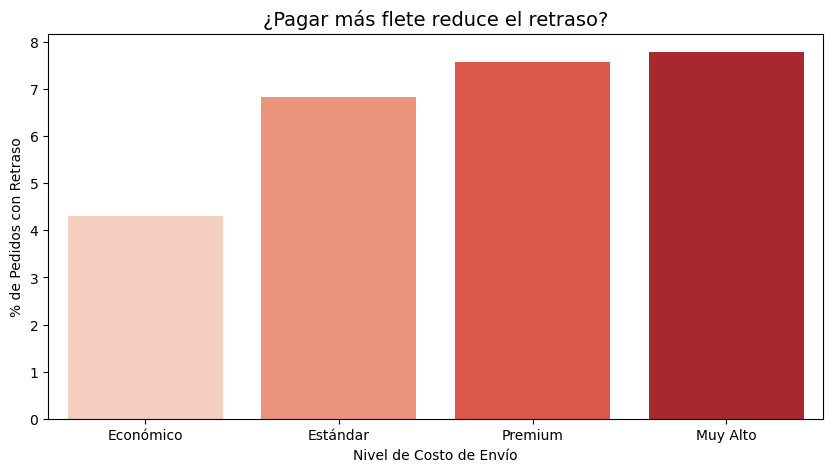

In [34]:
# 3. Visualización de la "Promesa Incumplida"
plt.figure(figsize=(10, 5))
sns.barplot(
    x='freight_tier', 
    y='porcentaje_retraso', 
    data=freight_delay_rate, 
    palette='Reds', 
    hue='freight_tier', 
    legend=False
)
plt.title('¿Pagar más flete reduce el retraso?', fontsize=14)
plt.ylabel('% de Pedidos con Retraso')
plt.xlabel('Nivel de Costo de Envío')
plt.show()

#### Conclusión para tu celda de análisis:
"El gráfico confirma una relación irónica: el nivel de flete más costoso es el que sufre mayor incumplimiento. Esto valida que el precio del envío en Olist está ligado exclusivamente a la complejidad geográfica y no a una mejora en la prioridad del servicio."

## 6. Correlación Multivariable: Logística vs. Satisfacción
* **Objetivo**: Cuantificar la fuerza de la relación entre el costo del flete, los tiempos de entrega y la calificación final del usuario mediante una matriz de correlación.
* **Hipótesis**: El retraso en la entrega (delta_estimated_days) es la variable con mayor impacto negativo sobre el review_score, superando al costo del flete o al tiempo total de tránsito.

In [37]:
# 1. Selecciono las columnas numéricas clave para el análisis
# Incluyo precio, flete, días de entrega, el delta (retraso) y la calificación
df_corr = pd.merge(
    df_freight,
    orders_reviews[['order_id', 'review_score']],
    on='order_id'
)
df_corr.head(3)

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight,freight_tier,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,A tiempo / Anticipado,8.0,-8.0,SP,8.72,Económico,4
1,53cdb2fc8bc7dce0b6741e2150273451,A tiempo / Anticipado,13.0,-6.0,BA,22.76,Premium,4
2,47770eb9100c2d0c44946d9cf07ec65d,A tiempo / Anticipado,9.0,-18.0,GO,19.22,Premium,5


In [38]:
# 2. Selecciono solo las variables que quiero correlacionar
columns_interest = [
    'delivery_time_days', 
    'delta_estimated_days', 
    'total_items_freight', 
    'review_score'
]
correlation_matrix = df_corr[columns_interest].corr()
correlation_matrix

,delivery_time_days,delta_estimated_days,total_items_freight,review_score
delivery_time_days,1.000000,0.601624,0.167127,-0.333660
delta_estimated_days,0.601624,1.000000,-0.050431,-0.266764
total_items_freight,0.167127,-0.050431,1.000000,-0.088645
review_score,-0.333660,-0.266764,-0.088645,1.000000


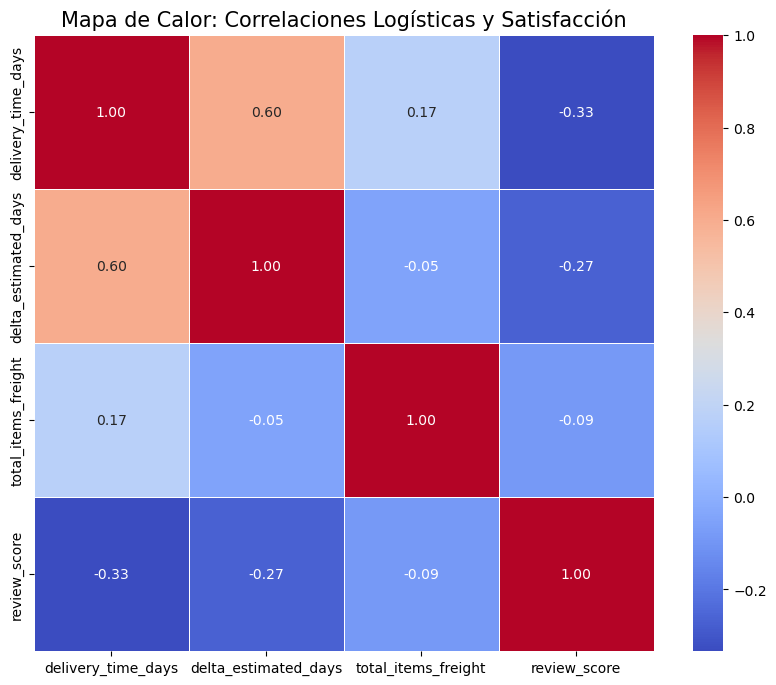

In [39]:
# 3. Visualización con un Heatmap (Mapa de Calor)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor: Correlaciones Logísticas y Satisfacción', fontsize=15)
# Guardo en formato PNG con alta resolución y ajustando el espacio para que no se corte el texto
plt.savefig('../reports/figures/logistics_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Conclusiones Estratégicas del Análisis Logístico

* **Prioridad Logística**: El tiempo total de entrega (delivery_time_days) tiene un impacto negativo de -0.33 en la satisfacción, siendo la variable más crítica del modelo, la variable con mayor peso en el modelo. No se trata solo de entregar, sino de la **velocidad**. Una correlación de este tipo confirma que por cada día adicional que el paquete pasa en tránsito, la probabilidad de recibir una reseña negativa aumenta de forma lineal y constante.

* **Mito del Flete**: Se desmiente que el costo del envío afecte directamente la calificación (correlación casi nula de -0.09 me dice que a esas dos variables *no les importa lo que haga la otra*, la relación es **insignificante**). Al cliente no le importa tanto el precio del flete, el cliente está dispuesto a pagar, siempre y cuando el servicio sea eficiente. Con esto veo *el Mito Roto*: Uno pensaría: "Si el envío es muy caro, el cliente se va a enojar y me va a poner 1 estrella". Pero mis datos dicen que **eso es mentira**. Por lo tanto, cuando llega el paquete, la garota no califica "qué tan caro fue", sino *"qué tan rápido llegó"*.

* **Falla Geográfica**:
    * *Analisis* : Existe una correlación positiva (una sube, la otra tambien) de 0.17 entre el costo del flete y los días de entrega.
    * *Insight* : Esto revela una ineficiencia geográfica crítica: en Olist, los envíos más costosos no son "Express", sino que representan los trayectos más difíciles hacia zonas remotas (Norte y Noreste).
    * *El Problema* : Al combinar fletes altos con tiempos de espera prolongados y mayores tasas de retraso, se genera una "tormenta perfecta" de insatisfacción en estas regiones. El cliente de estas zonas paga más por un servicio que, estructuralmente, es menos eficiente.

## 8. Detección de Outliers y Casos Críticos
* Objetivo: Identificar y analizar los pedidos con retrasos extremos (valores atípicos) para entender el impacto en los casos de falla catastrófica del servicio.
* Hipótesis: Los valores atípicos de retraso (outliers) son los principales responsables de las calificaciones de 1 estrella, representando fallos sistémicos que van más allá de la demora habitual por distancia.

In [43]:
# 1. Defino el umbral de 'Retraso Crítico' (ejemplo: más de 20 días de retraso sobre la promesa)
# Existen 795 rows con retrasos de 49, 47 dias
retrasos_criticos = df_freight[df_freight['delta_estimated_days'] > 20]

In [44]:
# 2. Análisis de Satisfacción en casos críticos
# Uno con reviews para ver el daño real
#orders_reviews.info()
df_critico = pd.merge(retrasos_criticos, orders_reviews[['order_id','review_score']], on='order_id')
print(df_critico.head(3))

promedio_critico = df_critico['review_score'].mean()
conteo_critico = len(df_critico)

print(f"Total de pedidos con retraso crítico (>20 días): {conteo_critico}")
print(f"Calificación promedio en estos casos: {promedio_critico:.2f} estrellas")

                           order_id delivery_status  delivery_time_days  \
0  9d531c565e28c3e0d756192f84d8731f       Retrasado                56.0   
1  8fc207e94fa91a7649c5a5dab690272a       Retrasado                54.0   
2  f31535f21d145b2345e2bf7f09d62322       Retrasado                81.0   

   delta_estimated_days customer_state  total_items_freight freight_tier  \
0                  32.0             RJ                14.10     Estándar   
1                  32.0             RJ                25.61     Muy Alto   
2                  49.0             RJ                24.26     Muy Alto   

   review_score  
0             1  
1             3  
2             1  
Total de pedidos con retraso crítico (>20 días): 769
Calificación promedio en estos casos: 1.77 estrellas


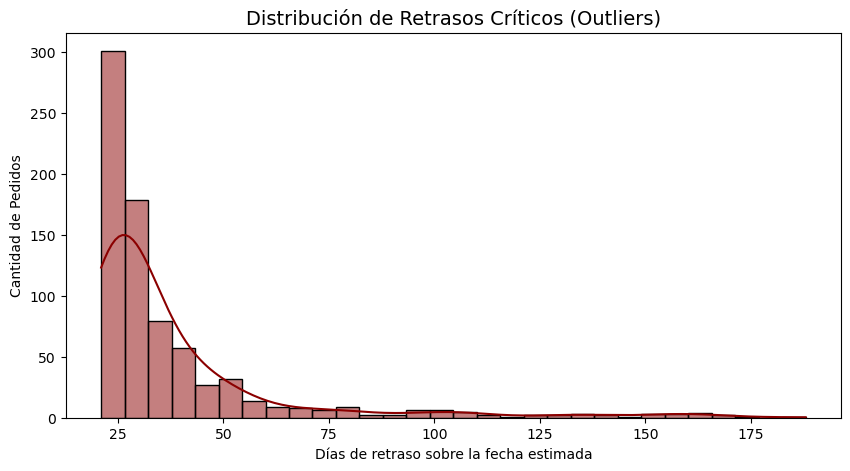

In [45]:
# 3. Visualización de la distribución de estos errores
plt.figure(figsize=(10, 5))
sns.histplot(df_critico['delta_estimated_days'], bins=30, kde=True, color='darkred')
plt.title('Distribución de Retrasos Críticos (Outliers)', fontsize=14)
plt.xlabel('Días de retraso sobre la fecha estimada')
plt.ylabel('Cantidad de Pedidos')
# Guardo en formato PNG con alta resolución y ajustando el espacio para que no se corte el texto
plt.savefig('../reports/figures/distribution_critical_delays.png', dpi=300, bbox_inches='tight')
plt.show()

### 📝 Interpretación de la Sección 8: Análisis de Outliers
Nota de Análisis: El histograma superior muestra la distribución de los 769 pedidos identificados como "Retrasos Críticos" (aquellos que superaron por más de 20 días la fecha prometida de entrega).
#### 🔍 Hallazgos Clave:
* La "Cola Larga" (Long Tail): Observamos que aunque la mayoría de los errores se agrupan cerca de los 25-30 días de retraso, existe una "cola" persistente que llega hasta los 175 días. Estos no son simples retrasos, son fallos operativos graves.
* Frecuencia (Eje Y): La "Cantidad de Pedidos" nos indica cuántas veces ocurrió un error de esa magnitud. La concentración más alta está en el primer bloque, pero cada unidad que se desplaza hacia la derecha en el eje X representa un cliente con una experiencia de compra nula.
* Impacto en Reputación: Con un Score promedio de 1.77 estrellas, estos 769 casos actúan como detractores críticos. En términos de negocio, un solo outlier de 100 días de retraso puede generar más daño en redes sociales y soporte técnico que 100 pedidos entregados a tiempo.

#### 🕵️‍♂️ Sección 8.1: Localizando el Origen del Caos
* Identificar los Top 5 Estados y Top 5 Vendedores con más casos de retraso crítico

In [48]:
df_critico.head()

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight,freight_tier,review_score
0,9d531c565e28c3e0d756192f84d8731f,Retrasado,56.0,32.0,RJ,14.10,Estándar,1
1,8fc207e94fa91a7649c5a5dab690272a,Retrasado,54.0,32.0,RJ,25.61,Muy Alto,3
2,f31535f21d145b2345e2bf7f09d62322,Retrasado,81.0,49.0,RJ,24.26,Muy Alto,1
3,690199d6a2c51ff57c6b392d7680cbfd,Retrasado,59.0,33.0,PR,18.26,Premium,5
4,cafc9b2f7d35ec42bdb74347cc6e8a70,Retrasado,75.0,47.0,CE,17.63,Premium,1


In [49]:
# 1. ¿Dónde viven los clientes que sufrieron estos retrasos de >20 días?
peores_estados = df_critico['customer_state'].value_counts().head()
#print(peores_estados)
peores_estados_pct = (df_critico['customer_state'].value_counts(normalize=True).head()*100).round(2)
print(peores_estados_pct)

customer_state
RJ    40.70
SP    16.91
BA     5.46
MG     5.07
CE     4.81
Name: proportion, dtype: float64


In [50]:
# 2. ¿Quiénes son los vendedores (Sellers) con más retrasos críticos?
# TRAER SELLERS: Hago merge con items_cleaned para identificar a los responsables
# Uso items_cleaned porque ahí está la relación entre producto, vendedor y orden
df_critico_sellers = pd.merge(
    df_critico,
    items[['order_id', 'seller_id']],
    on='order_id',
    how='left'
)
# df_critico_sellers.head()

In [51]:
# 3. ¿Quiénes son los vendedores con más retrasos críticos?
peores_vendedores = df_critico_sellers['seller_id'].value_counts().head(5)

In [52]:
print("--- 📍 ESTADOS CON MÁS RETRASOS CRÍTICOS ---")
print(peores_estados)

print("\n--- 🏪 VENDEDORES CON MÁS RETRASOS CRÍTICOS ---")
print(peores_vendedores)

--- 📍 ESTADOS CON MÁS RETRASOS CRÍTICOS ---
customer_state
RJ    313
SP    130
BA     42
MG     39
CE     37
Name: count, dtype: int64

--- 🏪 VENDEDORES CON MÁS RETRASOS CRÍTICOS ---
seller_id
54965bbe3e4f07ae045b90b0b8541f52    21
1f50f920176fa81dab994f9023523100    18
4a3ca9315b744ce9f8e9374361493884    18
7c67e1448b00f6e969d365cea6b010ab    15
da8622b14eb17ae2831f4ac5b9dab84a    13
Name: count, dtype: int64


##### 📝 Análisis de los resultados:
* El "Factor Río" (RJ): Con 313 pedidos, Río de Janeiro concentra casi el 41% de todos los retrasos críticos del país. Esto confirma que Olist tiene un problema estructural grave en ese estado (posiblemente logística de última milla o zonas de riesgo).
* Vendedores Reincidentes: Tienes un vendedor (54965bbe...) con 21 pedidos catastróficos. Aunque parezca poco, si cada uno de esos clientes dio 1 estrella, ese solo vendedor está dañando significativamente la métrica global de satisfacción de la plataforma.

#### 🕵️‍♂️ Sección 8.2: Perfil Operativo de los Peores Vendedores
* Objetivo: Determinar si los fallos críticos de los peores vendedores se deben a la naturaleza del producto (logística pesada) o a ineficiencia pura del vendedor.

In [55]:
# 1. Filtro los indices por los 5 peores vendedores y los guardo en una lista.
top_5_sellers = peores_vendedores.index.to_list()
print(top_5_sellers)

['54965bbe3e4f07ae045b90b0b8541f52', '1f50f920176fa81dab994f9023523100', '4a3ca9315b744ce9f8e9374361493884', '7c67e1448b00f6e969d365cea6b010ab', 'da8622b14eb17ae2831f4ac5b9dab84a']


In [56]:
#2. Filtro los ítems vendidos por los 5 peores vendedores que identificaron en la 8.1
df_desastre = items[items['seller_id'].isin(top_5_sellers)]
df_desastre.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


In [57]:
# 3. Uno con productos para obtener dimensiones y peso
df_desastre_prod = pd.merge(df_desastre, products, on='product_id')
df_desastre_prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0
1,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
2,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
3,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,2018-03-21 11:10:11,119.99,44.40,moveis_escritorio,46.0,1159.0,1.0,9375.0,55.0,54.0,19.0
4,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.00,13.71,cama_mesa_banho,55.0,312.0,1.0,1550.0,44.0,14.0,34.0


In [58]:
# 4. Calculo métricas comparativas: ¿Son productos pesados o voluminosos?
peso_promedio_critico = df_desastre_prod['product_weight_g'].mean()
peso_promedio_global = products['product_weight_g'].mean()

print(f"--- 📏 ANÁLISIS DE PESO (Outliers vs Global) ---")
print(f"Peso promedio productos críticos: {peso_promedio_critico:.2f}g")
print(f"Peso promedio global: {peso_promedio_global:.2f}g")

--- 📏 ANÁLISIS DE PESO (Outliers vs Global) ---
Peso promedio productos críticos: 3691.04g
Peso promedio global: 2276.33g


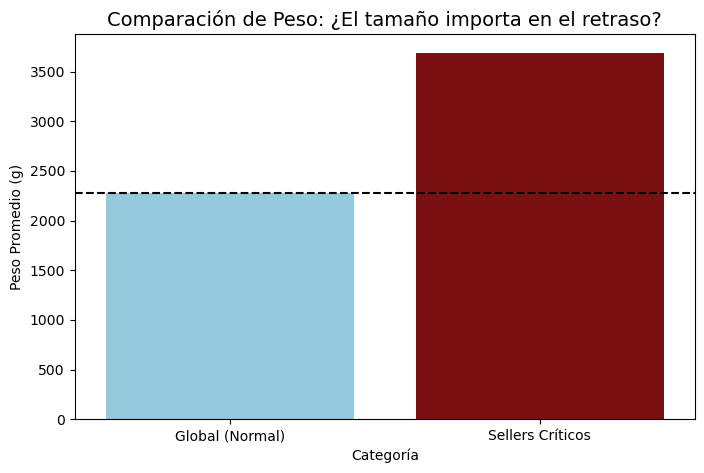

In [59]:
# 5. Creo un DataFrame pequeño para graficar
data_grafico = pd.DataFrame({
    'Categoría': ['Global (Normal)', 'Sellers Críticos'],
    'Peso Promedio (g)': [2276.33, 3691.04]
})

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Categoría', 
    y='Peso Promedio (g)', 
    data=data_grafico, 
    palette=['skyblue', 'darkred'],
    hue='Categoría',
    legend=False
)
plt.title('Comparación de Peso: ¿El tamaño importa en el retraso?', fontsize=14)
plt.axhline(2276.33, color='black', linestyle='--') # Línea de referencia
plt.show()

##### 📝 Conclusión de esta seccion 8.2
* Los datos revelan que los productos con retrasos críticos pesan, en promedio, un 62% más que el producto promedio de Olist ($3691\text{g}$ vs $2276\text{g}$).
* Esto sugiere que el problema no es solo la eficiencia del vendedor, sino una limitación en la red de transporte para productos medianos/voluminosos, ¿Qué pesa 4 kilos? Cosas como una freidora de aire, un monitor de computadora, un set de ollas o una aspiradora pequeña.
* Estos productos de 4kg son demasiado grandes para el correo estándar rápido (que ama los sobres y paquetes de <1kg) pero no lo suficientemente grandes para ir en camiones de mudanza pesada. Se quedan atrapados en un limbo logístico.
* Sin embargo, 4kg no justifican retrasos de más de 20 días, por lo que existe una combinación de mala logística regional y deficiencia operativa en los vendedores identificados.

#### 🕵️‍♂️ Sección 8.3: El Análisis de "Última Milla"
* Objetivo: Determinar con calculos si los retrasos críticos ocurren porque el vendedor está en una punta de Brasil y el cliente en otra.

In [62]:
# Necesito los estados del vendedor para comparar con el del cliente
# Ya tengo el df_critico_sellers del paso anterior
# Pero necesito el dataset del vendedor.
sellers_dataset = pd.read_csv('../data/raw/olist_sellers_dataset.csv')
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [63]:
# 1. Conocer los estados del vendedor para comparar con el del cliente
df_critico_sellers.head()

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight,freight_tier,review_score,seller_id
0,9d531c565e28c3e0d756192f84d8731f,Retrasado,56.0,32.0,RJ,14.10,Estándar,1,903037660cf848a717166eb7a06d616e
1,8fc207e94fa91a7649c5a5dab690272a,Retrasado,54.0,32.0,RJ,25.61,Muy Alto,3,4a3ca9315b744ce9f8e9374361493884
2,f31535f21d145b2345e2bf7f09d62322,Retrasado,81.0,49.0,RJ,24.26,Muy Alto,1,91f0eec23d4a61d7d7caeefa3f0ad1ca
3,690199d6a2c51ff57c6b392d7680cbfd,Retrasado,59.0,33.0,PR,18.26,Premium,5,cc419e0650a3c5ba77189a1882b7556a
4,cafc9b2f7d35ec42bdb74347cc6e8a70,Retrasado,75.0,47.0,CE,17.63,Premium,1,b561927807645834b59ef0d16ba55a24


In [64]:
df_final_critico = pd.merge(
    df_critico_sellers,
    sellers_dataset[['seller_id','seller_state']],
    on='seller_id',
    how='left'
)
df_final_critico.head()

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight,freight_tier,review_score,seller_id,seller_state
0,9d531c565e28c3e0d756192f84d8731f,Retrasado,56.0,32.0,RJ,14.10,Estándar,1,903037660cf848a717166eb7a06d616e,SP
1,8fc207e94fa91a7649c5a5dab690272a,Retrasado,54.0,32.0,RJ,25.61,Muy Alto,3,4a3ca9315b744ce9f8e9374361493884,SP
2,f31535f21d145b2345e2bf7f09d62322,Retrasado,81.0,49.0,RJ,24.26,Muy Alto,1,91f0eec23d4a61d7d7caeefa3f0ad1ca,SC
3,690199d6a2c51ff57c6b392d7680cbfd,Retrasado,59.0,33.0,PR,18.26,Premium,5,cc419e0650a3c5ba77189a1882b7556a,SP
4,cafc9b2f7d35ec42bdb74347cc6e8a70,Retrasado,75.0,47.0,CE,17.63,Premium,1,b561927807645834b59ef0d16ba55a24,SP


In [65]:
# 2. Creo una flag: ¿Es una entrega interestatal (diferente estado)?
# Comparo si el estado del cliente es DIFERENTE al del vendedor
df_final_critico['is_interstate'] = df_final_critico['customer_state'] != df_final_critico['seller_state']
df_final_critico.head()

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight,freight_tier,review_score,seller_id,seller_state,is_interstate
0,9d531c565e28c3e0d756192f84d8731f,Retrasado,56.0,32.0,RJ,14.10,Estándar,1,903037660cf848a717166eb7a06d616e,SP,True
1,8fc207e94fa91a7649c5a5dab690272a,Retrasado,54.0,32.0,RJ,25.61,Muy Alto,3,4a3ca9315b744ce9f8e9374361493884,SP,True
2,f31535f21d145b2345e2bf7f09d62322,Retrasado,81.0,49.0,RJ,24.26,Muy Alto,1,91f0eec23d4a61d7d7caeefa3f0ad1ca,SC,True
3,690199d6a2c51ff57c6b392d7680cbfd,Retrasado,59.0,33.0,PR,18.26,Premium,5,cc419e0650a3c5ba77189a1882b7556a,SP,True
4,cafc9b2f7d35ec42bdb74347cc6e8a70,Retrasado,75.0,47.0,CE,17.63,Premium,1,b561927807645834b59ef0d16ba55a24,SP,True


In [66]:
# 3. Calculo el porcentaje de desastres que son interestatales
pct_interstate = (df_final_critico['is_interstate'].mean()*100).round(3)
pct_interstate

87.923

In [67]:
print(f"--- 🌎 ANÁLISIS GEOGRÁFICO DE CRÍTICOS ---")
print(f"Porcentaje de retrasos críticos en viajes interestatales: {pct_interstate:.2f}%")

--- 🌎 ANÁLISIS GEOGRÁFICO DE CRÍTICOS ---
Porcentaje de retrasos críticos en viajes interestatales: 87.92%


##### 📝 Conclusión para esta Sección 8.3
* El análisis geográfico confirma que el 87.92% de los retrasos críticos ocurren en operaciones interestatales. Esto demuestra que la mayor fricción logística no reside en el despacho inicial del vendedor, sino en el tránsito de larga distancia entre diferentes estados de Brasil. Este dato cambia el enfoque de mi proyecto de "Vendedores lentos" a "Problema de Infraestructura Nacional".

In [122]:
df_critico.head()
# Guardo solo los casos críticos para el reporte final
df_critico.to_csv('../data/processed/orders_criticos_logistica.csv', index=False)